In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [3]:
df = pd.read_csv('../data/bankloan.csv')
df = df.dropna()
df = df.drop('Loan_ID', axis = 1)
df['LoanAmount'] = (df['LoanAmount'] * 1000).astype('int')
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

In [4]:
pre_y = df['Loan_Status']
pre_x = df.drop('Loan_Status', axis = 1)
dm_x = pd.get_dummies(pre_x)
dm_y = pre_y.map({'Y':1, 'N':0})

In [5]:
smote = SMOTE(sampling_strategy = 'minority')
x1, y = smote.fit_resample(dm_x, dm_y)
sc = MinMaxScaler()
x = sc.fit_transform(x1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size = 0.2, random_state =42, shuffle = True)

In [7]:
classifier = Sequential()
classifier.add(Dense(400, activation = 'relu', kernel_initializer='random_normal', input_dim=X_test.shape[1]))
classifier.add(Dense(800, activation = 'relu', kernel_initializer='random_normal'))
classifier.add(Dense(20, activation = 'relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation = 'sigmoid', kernel_initializer='random_normal'))
classifier.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, y_train, batch_size = 20, epochs = 50, verbose=0)
eval_model = classifier.evaluate(X_train, y_train)
eval_model

17/17 [==============================] - 0s 1ms/step - loss: 0.2335 - accuracy: 0.8983


[0.23350711166858673, 0.8983050584793091]

In [8]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.4)

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

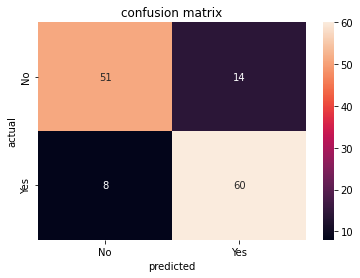

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax=ax)

ax.set_xlabel('predicted')
ax.set_ylabel('actual')
ax.set_title('confusion matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

In [10]:
classifier.save('./rev00/')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./rev00/assets


In [11]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=4, shuffle = True, random_state = 42)
cvscores = []
for train, test in kfold.split(x, y):
    
    model = Sequential()
    model.add(Dense(400, activation = 'relu', kernel_initializer='random_normal', input_dim=X_test.shape[1]))
    model.add(Dense(800, activation = 'relu', kernel_initializer='random_normal'))
    model.add(Dense(20, activation = 'relu', kernel_initializer='random_normal'))
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer='random_normal'))
    
    model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(x[train], y[train], epochs = 100, verbose=0)
    scores = model.evaluate(x[test], y[test], verbose =0)
    
    print(f"{model.metrics_names[1]} : {round(scores[1]*100, 2)}" )
    
    cvscores.append(round(scores[1]*100, 2))
    
print(f"{round(np.mean(cvscores), 2)} : {round(np.std(cvscores), 2)}" )

accuracy : 77.71
accuracy : 80.72
accuracy : 82.53
accuracy : 79.52
80.12 : 1.76


In [12]:
reconstructed_model = tensorflow.keras.models.load_model("./rev00/")

In [ ]:
# #for neural
# reconstructed_model = tensorflow.keras.models.load_model("./rev00/")
# test = pd.read_csv('../data/bankloan.csv')
# test = test.dropna()
# test = test.drop('Loan_ID', axis = 1)
# test['LoanAmount'] = (test['LoanAmount'] * 1000).astype('int')

# test_y = test['Loan_Status']
# test_y = test_y.map({'Y':1, 'N':0})

# test_x = test.drop('Loan_Status', axis = 1)

# test_x = pd.get_dummies(test_x)
# test_x.columns

# sc = MinMaxScaler()
# test_x = sc.fit_transform(test_x)

# test_prediction = reconstructed_model.predict(test_x)
# test_prediction = (test_prediction > 0.4)
# #test_prediction
# results = pd.DataFrame(test_prediction , columns= ["status"] )
# results = results.replace({True:'approved', False:'Rejected'})

In [ ]:
#to be run to create pickles

In [131]:
from sklearn.preprocessing import OneHotEncoder
import pickle
import joblib

In [132]:
test = pd.read_csv('../data/bankloan.csv')
test = test.dropna()
test = test.drop('Loan_ID', axis = 1)
test['LoanAmount'] = (test['LoanAmount'] * 1000).astype('int')

In [133]:
test_y = test['Loan_Status']
test_y = test_y.map({'Y':1, 'N':0})

In [134]:
test_x = test.drop('Loan_Status', axis = 1)

In [135]:
ohe= OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe.fit(test_x[['Gender','Married','Education','Self_Employed','Property_Area']])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [136]:
test_encoded = pd.DataFrame(ohe.transform(test_x[['Gender','Married','Education','Self_Employed','Property_Area']]), 
                            columns = ['Gender_Female', 'Gender_Male', \
        'Married_No', 'Married_Yes', \
        'Education_Graduate', 'Education_Not Graduate', \
        'Self_Employed_No', 'Self_Employed_Yes', \
        'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban'])

In [137]:
test_x = test_x.reset_index(drop=True)
test_x = pd.concat([test_x[['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']], 
                    test_encoded], axis = 1)

In [138]:
sc = MinMaxScaler()
test_x = scaler.fit_transform(test_x)

In [58]:
with open("./rev01/ohe_rev00.sav", "wb") as f: 
    pickle.dump(ohe, f)
    
scaler_filename = "./rev01/scaler_rev00.sav"
joblib.dump(sc, scaler_filename)

In [ ]:
#treat as test

In [145]:
test = pd.read_csv('../data/bankloan.csv')
test = test.dropna()
test = test.drop('Loan_ID', axis = 1)
test['LoanAmount'] = (test['LoanAmount'] * 1000).astype('int')

test_y = test['Loan_Status']
test_y = test_y.map({'Y':1, 'N':0})

test_x = test.drop('Loan_Status', axis = 1) #to be removed

encoder = pickle.load(open("./rev01/ohe_rev00.sav", 'rb'))
encoded_data = encoder.transform(test_x[['Gender','Married','Education','Self_Employed','Property_Area']])

encoded_df = pd.DataFrame(encoded_data, columns = ['Gender_Female', 'Gender_Male', \
        'Married_No', 'Married_Yes', \
        'Education_Graduate', 'Education_Not Graduate', \
        'Self_Employed_No', 'Self_Employed_Yes', \
        'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban'])

test_x = test_x.reset_index(drop=True)
test_x = pd.concat([test_x[['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']], 
                    encoded_df], axis = 1)

scaler_filename = "./rev01/scaler_rev00.sav"
scaler = joblib.load(scaler_filename) 
test_x = scaler.fit_transform(test_x)

In [157]:
# load the model from disk
filename = './rev01/svm_rev00.sav'
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(test_x)

In [158]:
result = loaded_model.score(test_x, test_y)
print(result)

0.8083333333333333


In [160]:
y_pred[0]

1

In [15]:
from sklearn import svm

In [153]:
clf = svm.SVC()
clf.fit(X_train, y_train) #X_test, y_test

SVC()

In [154]:
y_pred = clf.predict(X_test)

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

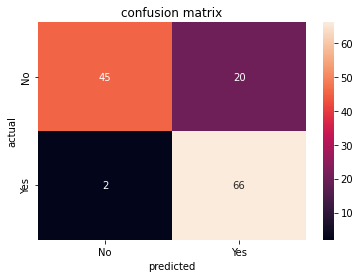

In [155]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax=ax)

ax.set_xlabel('predicted')
ax.set_ylabel('actual')
ax.set_title('confusion matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

In [24]:
import pickle
filename = './rev01/svm_rev00.sav'
pickle.dump(clf, open(filename, 'wb'))

In [25]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [26]:
result = loaded_model.score(X_test, y_test)
print(result)

0.8345864661654135
